In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/all_lc/'

In [2]:
sectors = [pd.read_csv('TESS-Gaia/gaiatess{0}_xmatch_1arsec-result.csv'.format(n+1)) for n in range(15)]
data = pd.concat(sectors,sort=True)

In [3]:
for col in data.columns:
    print(col)

a_g_percentile_lower
a_g_percentile_upper
a_g_val
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_gof_al
astrometric_matched_observations
astrometric_n_bad_obs_al
astrometric_n_good_obs_al
astrometric_n_obs_ac
astrometric_n_obs_al
astrometric_params_solved
astrometric_primary_flag
astrometric_pseudo_colour
astrometric_pseudo_colour_error
astrometric_sigma5d_max
astrometric_weight_al
b
bp_g
bp_rp
camera
ccd
datalink_url
dec
dec.1
dec_
dec_error
dec_parallax_corr
dec_pmdec_corr
dec_pmra_corr
designation
dist
duplicated_source
e_bp_min_rp_percentile_lower
e_bp_min_rp_percentile_upper
e_bp_min_rp_val
ecl_lat
ecl_lon
epoch_photometry_url
flame_flags
frame_rotator_object_type
g_rp
l
lum_percentile_lower
lum_percentile_upper
lum_val
matched_observations
mean_varpi_factor_al
modality_flag
parallax
parallax_error
parallax_over_error
parallax_pmdec_corr
parallax_pmra_corr
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_mag

In [4]:
tmin, tmax = 5300, 6000

In [5]:
distance = data['r_est']
M_G = data['phot_g_mean_mag'] - 5*np.log10(data['r_est']) + 5

In [6]:
distance.size, M_G.size

(269060, 269060)

Text(0, 0.5, 'Gmag')

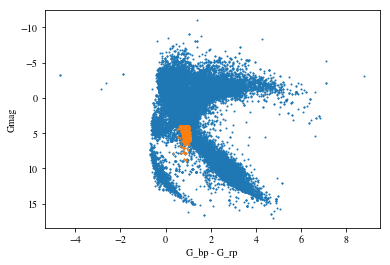

In [7]:
mask = (M_G > 4) & (M_G < 10) & (data['teff_val'] > tmin) & (data['teff_val'] < tmax)
plt.scatter(data['phot_bp_mean_mag'] - data['phot_rp_mean_mag'], M_G, s=1)
plt.scatter(data['phot_bp_mean_mag'][mask] - data['phot_rp_mean_mag'][mask], M_G[mask], s=1)
plt.gca().invert_yaxis()
plt.xlabel('G_bp - G_rp')
plt.ylabel('Gmag')

In [8]:
data[mask]

,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,...,tess_sector3_oid,tess_sector4_oid,tess_sector5_oid,tess_sector6_oid,tess_sector7_oid,tess_sector8_oid,tess_sector9_oid,ticid,tmag,visibility_periods_used
16,0.0160,0.2803,0.0857,387.74338,0.000000,0.000000e+00,6.233439,27,3,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317350640,9.71,17
19,0.2289,0.5806,0.3160,365.52255,0.000000,0.000000e+00,6.182300,25,2,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323423533,8.66,17
27,0.0986,0.2810,0.1730,494.93542,0.000000,0.000000e+00,11.152177,22,4,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394680654,9.79,15
39,0.0555,0.4820,0.2655,699.01416,0.000000,1.075677e+00,14.423836,28,9,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302967382,9.14,18
47,0.0644,0.2124,0.1447,1056.52040,0.128244,7.715698e+00,21.401638,28,6,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370328257,8.92,17
48,0.0164,0.2270,0.0960,15245.20900,1.090255,4.153175e+02,96.669365,23,14,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269764590,10.26,16
50,0.0170,0.2690,0.1153,429.18330,0.000000,0.000000e+00,8.685881,24,6,206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394702423,9.53,17
52,0.0086,0.3378,0.1570,489.38162,0.000000,1.952011e-15,10.211791,25,7,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388197833,8.96,16
54,0.0080,0.0791,0.0340,317.96835,0.000000,0.000000e+00,7.037799,19,4,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394700124,9.16,15
63,0.0020,0.1604,0.0910,267.37305,0.000000,0.000000e+00,4.894342,21,4,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274017898,9.09,13


In [9]:
data[mask].to_csv('ticGAIA1to13solar.csv')

In [10]:
data[mask]['ticid']

16       317350640
19       323423533
27       394680654
39       302967382
47       370328257
48       269764590
50       394702423
52       388197833
54       394700124
63       274017898
65       394779569
74       290654393
80       263177505
86       273985865
87       273985862
90       394287434
91       261655437
94       394243542
98       394243496
99       273790703
101      273790547
108      394373042
110      314889149
123      350157956
124      370249636
127      314888810
129      269729127
137      394681742
142      270343746
148      270366351
           ...    
18825    237211184
18829    237203839
18834    420130716
18849    235679027
18850    362224688
18858    235684649
18861    235681622
18864    235681690
18867    235676786
18869    376880933
18872    424426624
18877    376881073
18880    235679398
18882    420106897
18883    235672807
18884    335964858
18885    336009034
18887    235677166
18890    288675915
18893    229618614
18895    229642505
18898    367

In [11]:
# Make a list of all lightcurve files of solar type stars
solar = pd.read_csv('ticGAIA1to13solar.csv')
df = pd.read_csv('1to13new_param_out.csv')
path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec1to13/'

In [12]:
path_mox = '/gscratch/stf/scw7/tessFlares/sec1to13/'
solar['ticid'].shape
filenames = []
for tic in solar['ticid'].values:
    match = df['file'][df['TIC'] == tic].values
    if len(match) > 0:
        for f in match:
            filenames.append(path+ f)

In [13]:
files = np.unique(filenames)

In [14]:
np.savetxt('solar_files.txt', files, fmt='%s')